PROBLEM STATEMENT: This project aim at using different machine learning algorithms to predict the sentiment of a text with the help of natural language processing tecniques.

#STEP 1: Import Libraries

In [171]:
#basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings('ignore')



In [172]:
#packages for data preparation (installed nlp_utils & contractions)

#nltk.download('all')
import nlp_utils, nltk, re, string
import contractions
import collections
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

#STEP 2
Import Dataset

In [173]:
# text analytics dataset
with open('TextAnalytics.txt','r') as data:
    dataset = data.read()
#dataset

#STEP 3: Data Preprocessing - Text Normalization

In [174]:
#striping \n and \t characters
dataset=dataset.split('\n')
corpus = [dataset]
for sent in dataset:
    corpus.append(sent.split('\t'))
#corpus

In [175]:
# converting to lowercase.
letters_only = re.sub(r'[^a-zA-Z]', " ", str(corpus))
letters_only=letters_only.lower()
token=nltk.sent_tokenize(letters_only)
#token

Removing Contractions 

In [176]:
## contractions are expanded and the letters are converted to lowercase.
conm = contractions.CONTRACTION_MAP
def contraction_remove(corpus_nda):
    for key,value in conm.items():
        corpus_nda = re.sub(r"{}".format(key),'{}'.format(value),corpus_nda)
        
    return corpus_nda

special = string.punctuation
def w_tokenization(corpus_nda):
    # convert into lower case
    corpus_nda = corpus_nda.lower()
    # contraction
    corpus_nda = contraction_remove(corpus_nda)
    # 
    tokens = nltk.word_tokenize(corpus_nda) # word tokens

Removing Alphanumeric Characters

In [177]:
### Alpha numeric characters and decimals are replaced with characters
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token):
    tokens = nlp_utils.w_tokenization(token)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda = list(map(clean_nda,token))
#corpus_nda

Putting Text Data in a Dataframe

In [178]:
df = pd.DataFrame(dataset)
df= df.rename(columns={0: 'Text'})
#df

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [180]:
df.head(50)

,Text
0,"0,""One of the other reviewers has mentioned th..."
1,"1,""A wonderful little production. <br /><br />..."
2,"2,""I thought this was a wonderful way to spend..."
3,"3,""Basically there's a family where a little b..."
4,"4,""Petter Mattei's """"Love in the Time of Money..."
5,"5,""Probably my all-time favorite movie, a stor..."
6,"6,""I sure would like to see a resurrection of ..."
7,"7,""This show was an amazing, fresh & innovativ..."
8,"8,""Encouraged by the positive comments about t..."
9,"9,""If you like original gut wrenching laughter..."


In [181]:
df.tail(50)

,Text
950,"950,""What a good movie! At last a picture reve..."
951,"951,""Had it with the one who raised you since ..."
952,"952,""Yes, it is a bit cheesy. But it's suspens..."
953,"953,""So it isn't an epic, but for people exper..."
954,"954,""I absolutely loved this film! I was hesit..."
955,"955,""Previous reviewer Claudio Carvalho gave a..."
956,"956,""Great premise, poor execution. Cast of gr..."
957,"957,""Have to agree that this movie and it's ta..."
958,"958,""I had two reasons for watching this swash..."
959,"959,""This film is an abomination of all that i..."


Removing Special Characters

In [182]:
#removing special characters
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("< />", '', regex=True, inplace=True)
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip(')')
df['Text'] = df['Text'].str.strip('(')
df

,Text
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...
3,Basically theres a family where a little boy (...
4,Petter Matteis Love in the Time of Money is a ...
...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...
996,I hated it. I hate selfaware pretentious inani...
997,I usually try to be professional and construct...
998,If you like me is going to see this in a film ...


Lemmatization, POS, Stopwords

In [183]:
df['Text'] = df['Text'].apply(nlp_utils.lemmatization_sentence)

In [184]:
Text=df['Text']
token = df['Text'].to_numpy()
token=nltk.sent_tokenize(str(token))
data = np.array(token)
#data

In [185]:
stop = stopwords.words('english')
text = data
text_tokens = word_tokenize(str(text))
tokens_without_sw = [word for word in text_tokens if not word in stop]
#print(tokens_without_sw)   


#STEP 4: Data Visualization

In [186]:
stopwords = set(stopwords.words("english"))

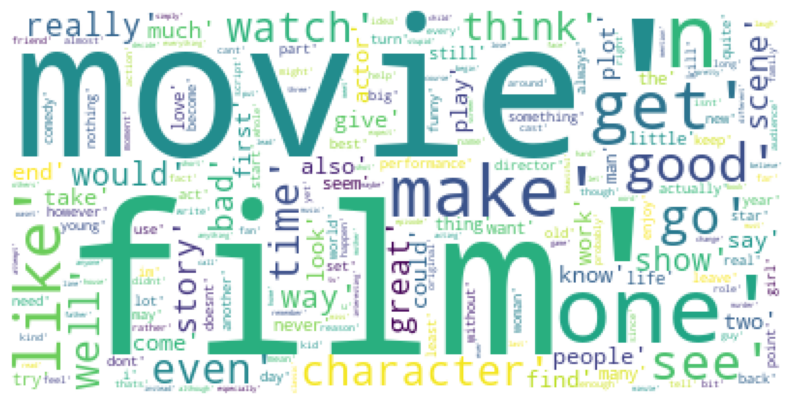

In [187]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [188]:
# creating two lists to display the words and their counts
tokens_without_sw=(str(tokens_without_sw))
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

counted_words.most_common(100) # the word 'movie' has repeated for 2081 times.

[("'movie',", 2019),
 ("'film',", 1779),
 ("'one',", 983),
 ("'make',", 895),
 ("'see',", 857),
 ("'like',", 828),
 ("'get',", 752),
 ("'good',", 645),
 ("'go',", 544),
 ("'watch',", 542),
 ("'time',", 534),
 ("'character',", 532),
 ("'even',", 513),
 ("'would',", 490),
 ("'bad',", 489),
 ("'think',", 471),
 ("'story',", 470),
 ("'really',", 453),
 ("'well',", 449),
 ("'scene',", 434),
 ("'much',", 392),
 ("'show',", 375),
 ("'great',", 375),
 ("'know',", 371),
 ("'take',", 363),
 ("'look',", 361),
 ("'people',", 358),
 ("'way',", 357),
 ("'give',", 353),
 ("'...',", 342),
 ("'say',", 337),
 ("'also',", 336),
 ("'come',", 335),
 ("'play',", 332),
 ("'first',", 326),
 ("'end',", 322),
 ("'find',", 311),
 ("'dont',", 309),
 ("'thing',", 300),
 ("'plot',", 298),
 ("'want',", 294),
 ("'many',", 283),
 ("'love',", 281),
 ("'life',", 278),
 ("'work',", 277),
 ("'never',", 273),
 ("'little',", 272),
 ("'seem',", 270),
 ("'could',", 269),
 ("'two',", 265),
 ("'actor',", 263),
 ('"\'",', 262),


<BarContainer object of 10 artists>

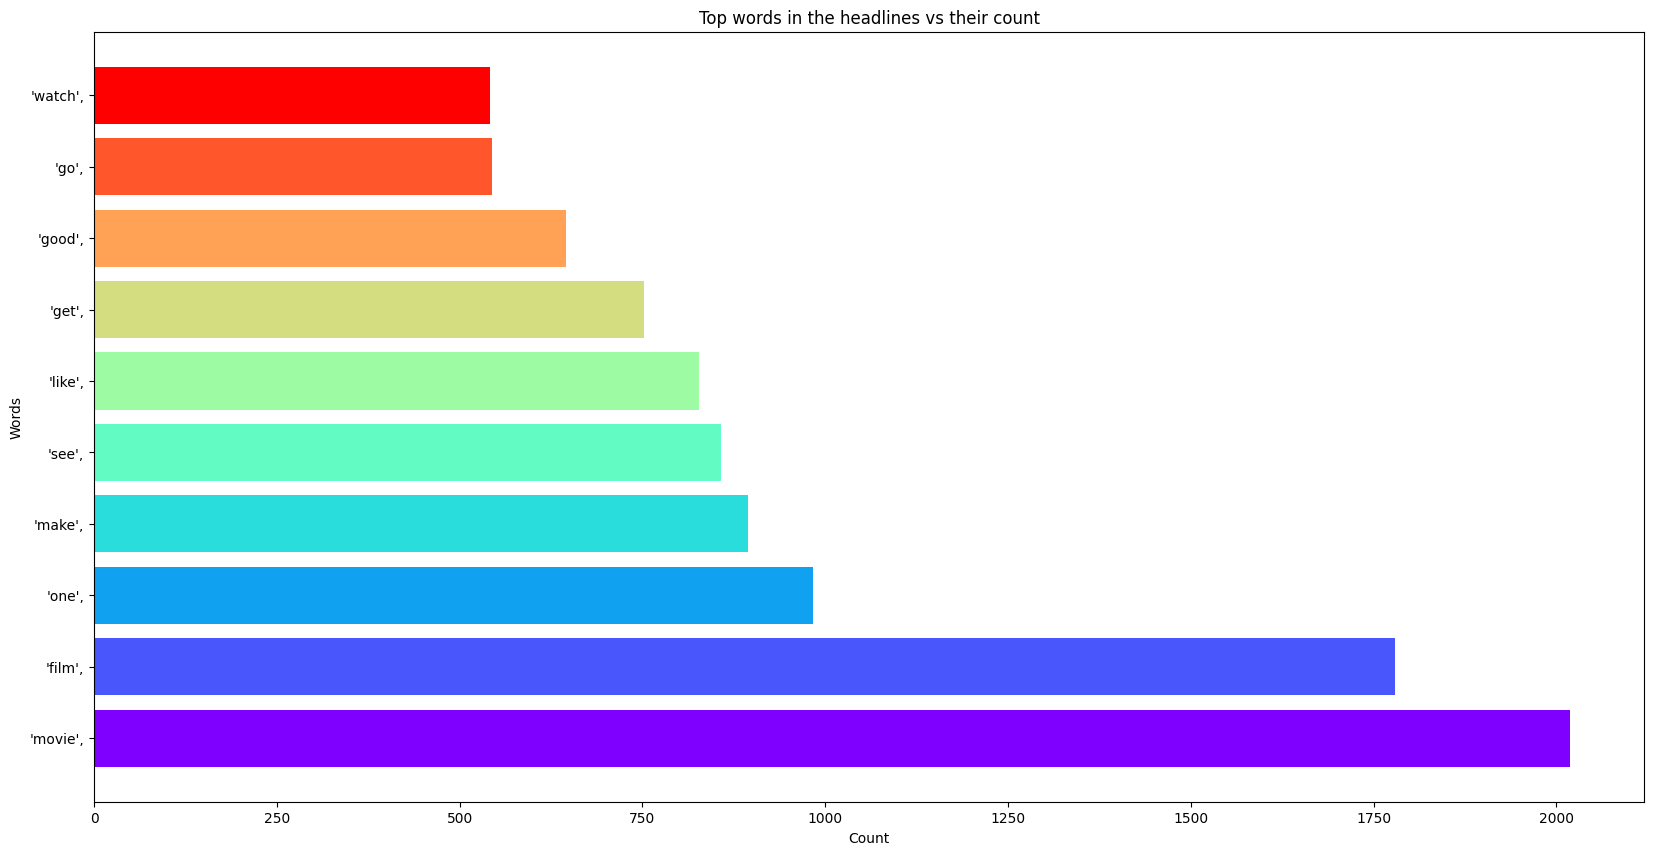

In [189]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

#STEP 5: Sentiment Analysis

In [190]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:        
        neu_word_list.append(word)                

#print('Positive:',pos_word_list)        
#print('Neutral:',neu_word_list)    
#print('Negative:',neg_word_list) 
#score = sid.polarity_scores(sentence)
#print('\nScores:', score)

In [191]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

one of the other reviewer have mention that after watch just oz episode youll be hook they be right a this be exactly what happen with me.the first thing that strike me about oz be it utality and unflinching scene of violence which set in right from the word go trust me this be not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it be hardcore in the classic use of the word.it be call oz a that be the nickname give to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy be not high on the agenda em city be home to many .. aryan muslim gangstas latinos christian italian irish and more .... so scuffles death stare dodgy dealing and shady agreement be never far away.i would say the main appeal of the show be due to the fact that it go where other show wouldnt dare forget pretty picture paint for mainstream audience

In [192]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [193]:
df.head()

,Text,neg,neu,pos,compound
0,one of the other reviewer have mention that af...,0.171,0.760,0.069,-0.9898
1,a wonderful little production the filming tech...,0.049,0.767,0.184,0.9711
2,i think this be a wonderful way to spend time ...,0.102,0.673,0.225,0.9748
3,basically theres a family where a little boy j...,0.131,0.803,0.067,-0.9080
4,petter matteis love in the time of money be a ...,0.052,0.800,0.148,0.9744


In [194]:
#Assigning score categories and logic
sentences=df
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['compound'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['compound'] > 0) & (sentences.iloc[i]['compound'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['compound'] <= 0)):
        predicted_value.append('negative')
        i = i+1

predicted_value
## The threshold value will categorize if a given sentence is positive negative or neutral in nature. 

df['Target'] = predicted_value
df.head()

,Text,neg,neu,pos,compound,Target
0,one of the other reviewer have mention that af...,0.171,0.760,0.069,-0.9898,negative
1,a wonderful little production the filming tech...,0.049,0.767,0.184,0.9711,positive
2,i think this be a wonderful way to spend time ...,0.102,0.673,0.225,0.9748,positive
3,basically theres a family where a little boy j...,0.131,0.803,0.067,-0.9080,negative
4,petter matteis love in the time of money be a ...,0.052,0.800,0.148,0.9744,positive


In [195]:
df.drop(['neg','neu','pos','compound'],axis=1,inplace=True)
df
## Dropping the neg, neu, pos, and compound columns.

,Text,Target
0,one of the other reviewer have mention that af...,negative
1,a wonderful little production the filming tech...,positive
2,i think this be a wonderful way to spend time ...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money be a ...,positive
...,...,...
995,nothing be sacred just ask ernie fosselius the...,negative
996,i hat it i hate selfaware pretentious inanity ...,negative
997,i usually try to be professional and construct...,negative
998,if you like me be go to see this in a film his...,negative


Text(0.5, 1.0, 'Negative Reviews')

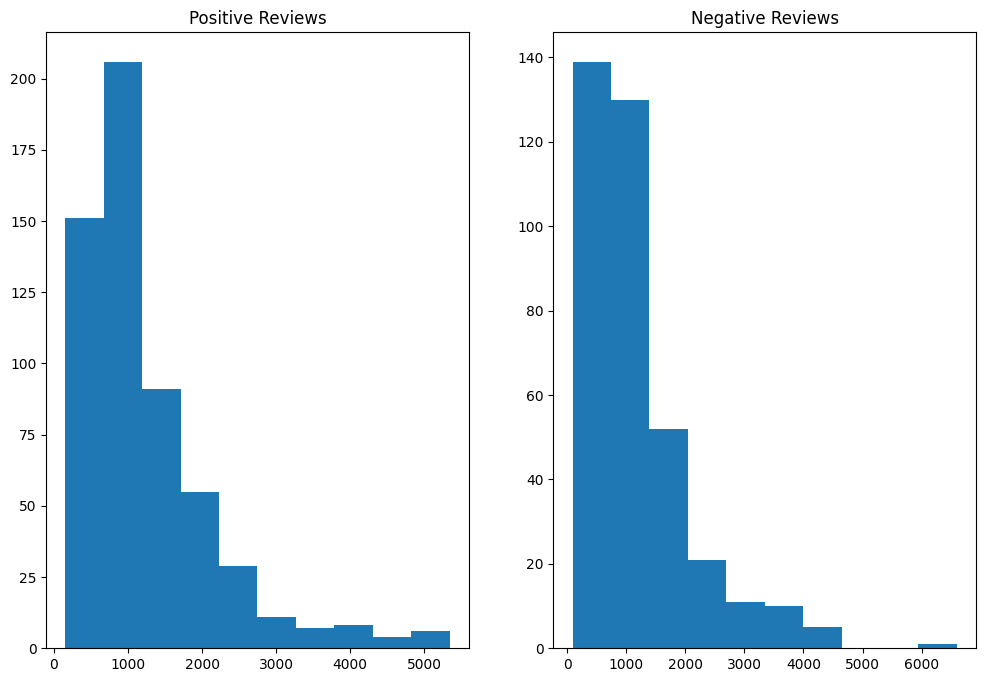

In [196]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['Target']=='positive']['Text'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['Target']=='negative']['Text'].str.len())
ax2.set_title( 'Negative Reviews')

Text(0.5, 1.0, 'Neutral Reviews')

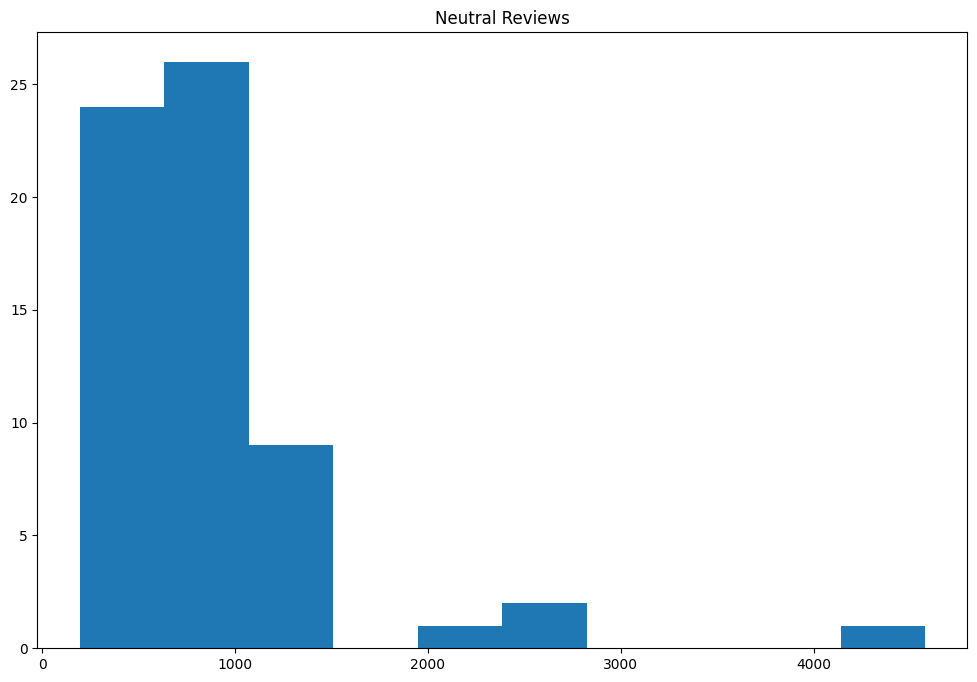

In [197]:
fig,(ax3)=plt.subplots(1, figsize=(12,8))
ax3.hist(df[df['Target']=='neutral']['Text'].str.len())
ax3.set_title( 'Neutral Reviews')

TRADITIONAL MACHINE LEARNING APPROACH

#STEP 4: Feature Extraction

In [198]:
## Applying Tf-Idf vectorizer on the Text column.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(df['Text'])
Y = df['Target']

In [199]:
#saving Tf-Idf vectorizer to later use in prediction
import pickle
tfidf_path = 'tfidf_Sentiment_Model.pk1'
pickle.dump(vectorizer, open(tfidf_path, "wb"))

#STEP 4
Prepare Dataset for Training

In [200]:
df.drop(df[df['Target'] == 'neutral'].index, inplace = True)

In [201]:
#saving Tf-Idf vectorizer to later use in prediction
import pickle
tfidf_path = 'tfidf_Sentiment_Model.pk1'
pickle.dump(vectorizer, open(tfidf_path, "wb"))

In [202]:
# Splitting the dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [203]:
X_train.shape

(750, 16215)

In [204]:
Y_train.shape

(750,)

LOGISTIC REGRESSION

#STEP 5: Model Training

In [205]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state =0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#STEP 6: Model Testing

In [206]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positi

In [207]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positi

In [208]:
#exporting logistic classifier to later make prediction
import joblib
joblib.dump(classifier, 'LR_Classifier_Sentiment_Model')

['LR_Classifier_Sentiment_Model']

#STEP 7
Model Evaluation

<AxesSubplot: >

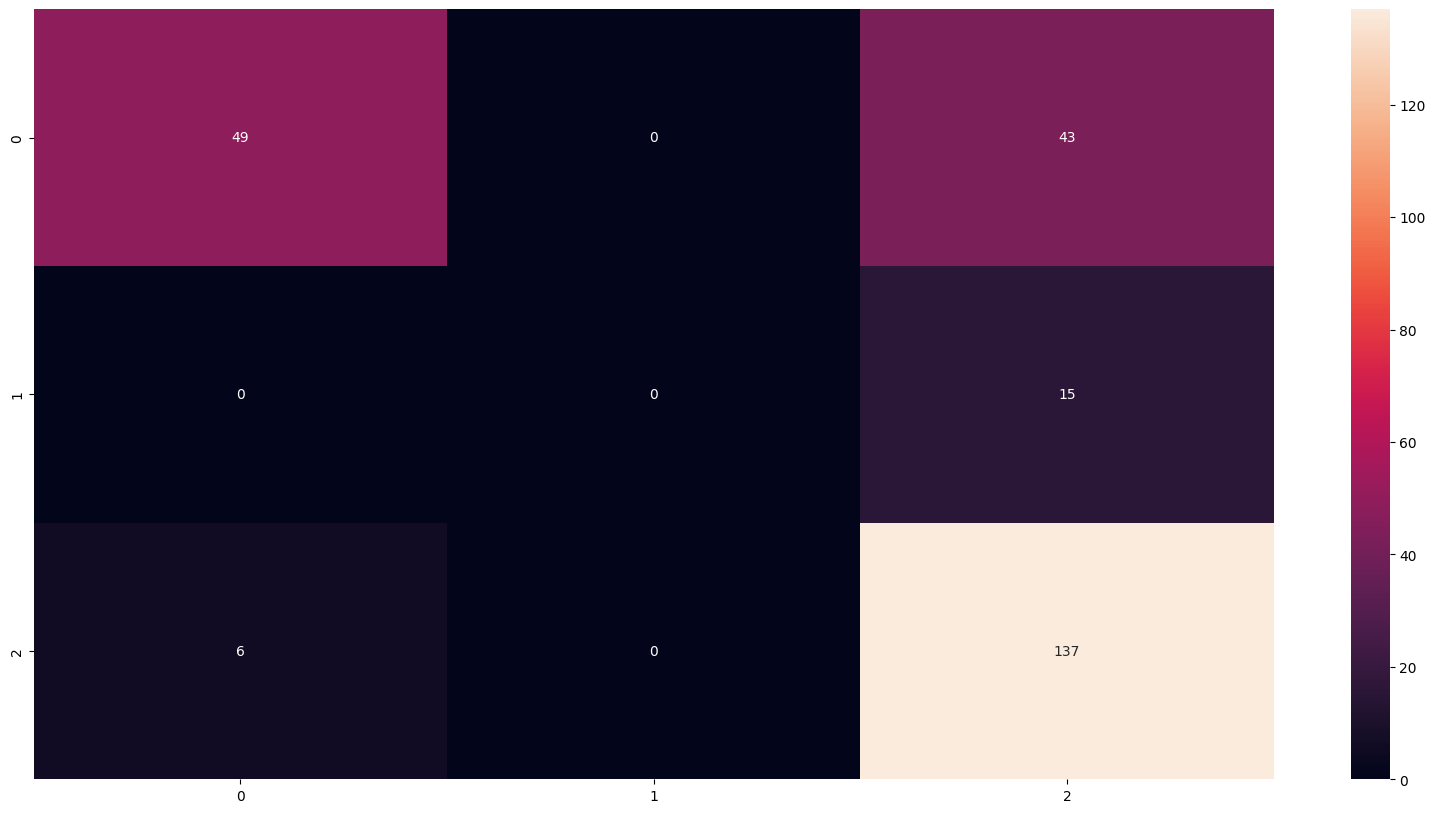

In [209]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm,annot=True, fmt='d')

In [210]:
#accuracy on test
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.89      0.53      0.67        92
     neutral       0.00      0.00      0.00        15
    positive       0.70      0.96      0.81       143

    accuracy                           0.74       250
   macro avg       0.53      0.50      0.49       250
weighted avg       0.73      0.74      0.71       250



In [211]:
#accuracy on train
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_predict_train))

              precision    recall  f1-score   support

    negative       0.98      0.97      0.98       277
     neutral       0.00      0.00      0.00        48
    positive       0.89      1.00      0.94       425

    accuracy                           0.93       750
   macro avg       0.62      0.66      0.64       750
weighted avg       0.87      0.93      0.90       750



NAIVE BAYES CLASSIFIER

#STEP 5: Model Training

In [212]:
#use GNB or MNB
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

#STEP 6: Model Testing

In [213]:
y_predict_test = MNB.predict(X_test)
y_predict_test

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

In [214]:
y_predict_train = MNB.predict(X_train)
y_predict_train

array(['positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

In [215]:
#exporting Naive Bayes classifier to later make prediction
import joblib
joblib.dump(MNB, 'MNB_Classifier_Sentiment_Model')

['MNB_Classifier_Sentiment_Model']

#STEP 7: Model Evaluation

<AxesSubplot: >

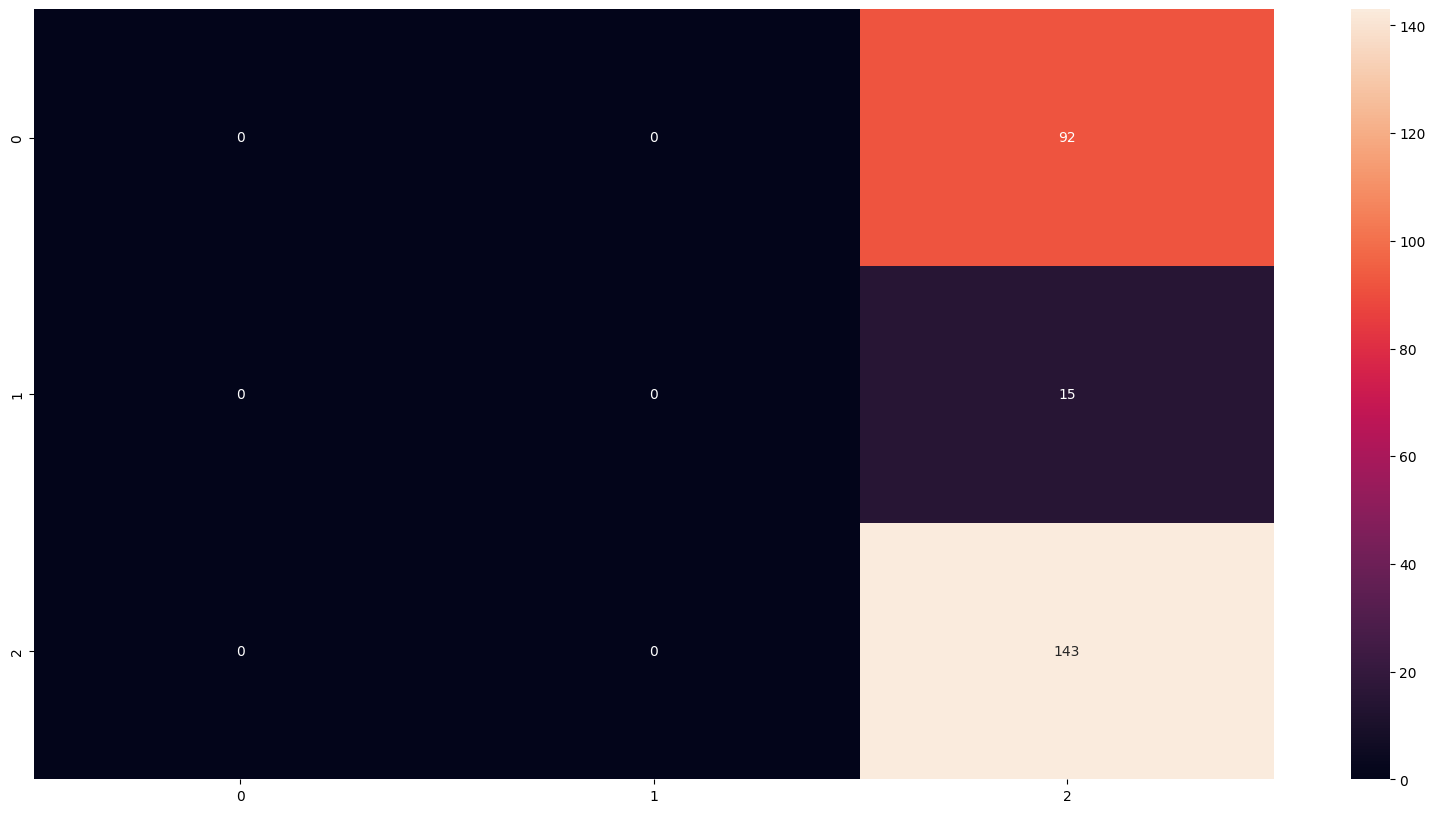

In [216]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm,annot=True, fmt='d')

In [217]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        92
     neutral       0.00      0.00      0.00        15
    positive       0.57      1.00      0.73       143

    accuracy                           0.57       250
   macro avg       0.19      0.33      0.24       250
weighted avg       0.33      0.57      0.42       250



In [218]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_predict_train))

              precision    recall  f1-score   support

    negative       1.00      0.02      0.04       277
     neutral       0.00      0.00      0.00        48
    positive       0.57      1.00      0.73       425

    accuracy                           0.57       750
   macro avg       0.52      0.34      0.26       750
weighted avg       0.69      0.57      0.43       750



DEEP LEARNING

Recurrent Neural Networks - Long Short Term Memory Networks (LSTM)


In [219]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras


In [220]:
from sklearn.preprocessing import LabelEncoder
reviews = df['Text'].values
labels = df['Target'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [221]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [222]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [223]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
 dense_6 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [224]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.25)

Epoch 1/5
17/17 [==============================] - 6s 163ms/step - loss: 0.6869 - accuracy: 0.5722 - val_loss: 0.6531 - val_accuracy: 0.6761
Epoch 2/5
17/17 [==============================] - 2s 112ms/step - loss: 0.6750 - accuracy: 0.5837 - val_loss: 0.6566 - val_accuracy: 0.6761
Epoch 3/5
17/17 [==============================] - 2s 108ms/step - loss: 0.6434 - accuracy: 0.5856 - val_loss: 0.6344 - val_accuracy: 0.6761
Epoch 4/5
17/17 [==============================] - 2s 116ms/step - loss: 0.5233 - accuracy: 0.8213 - val_loss: 0.6314 - val_accuracy: 0.6591
Epoch 5/5
17/17 [==============================] - 2s 121ms/step - loss: 0.2522 - accuracy: 0.9278 - val_loss: 0.9351 - val_accuracy: 0.5398


In [226]:
from sklearn.metrics import classification_report
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(classification_report(test_labels,pred_labels))

8/8 [==============================] - 0s 25ms/step
              precision    recall  f1-score   support

           0       0.46      0.72      0.56        93
           1       0.70      0.44      0.54       142

    accuracy                           0.55       235
   macro avg       0.58      0.58      0.55       235
weighted avg       0.61      0.55      0.55       235

